In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
dados = pd.read_csv('../scrapped-content/cities_gdp.csv', sep=',')

In [7]:
dados.describe()

,year,city_id,greater_region_code,state_id,meso_region_code,agro_value_1000_brl,industry_value_1000_brl,services_value_1000_brl,public_expending_value_1000_brl,total_value_1000_brl,taxes_value_1000_brl,total_gdp_1000_brl,gdp_per_capita_brl
count,55685.000000,5.568500e+04,55685.000000,55685.000000,55685.000000,55685.000000,55685.000000,55685.000000,55685.000000,55685.000000,55685.000000,55685.000000,55685.000000
mean,2014.500943,3.253430e+06,2.897656,32.376116,3241.876735,44411.776859,61580.119132,92430.697229,78424.432197,169922.762541,40288.472599,173105.380933,18961.003427
std,2.872088,9.847142e+05,1.087985,9.831897,983.440886,73482.051546,141526.528350,157971.540096,119158.659375,197914.927041,106514.462798,200673.515631,21034.792388
min,2010.000000,1.100015e+06,1.000000,11.000000,1101.000000,0.000000,0.000000,1000.090000,1000.750000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,2.512101e+06,2.000000,25.000000,2503.000000,8700.000000,2885.000000,12029.000000,20235.000000,41737.000000,2305.000000,42038.000000,7999.420000
50%,2015.000000,3.146255e+06,3.000000,31.000000,3110.000000,21753.000000,8429.000000,31093.000000,38409.000000,94610.000000,6722.000000,96808.000000,13591.610000
75%,2017.000000,4.119152e+06,4.000000,41.000000,4106.000000,49321.000000,40207.000000,89918.000000,81820.000000,216781.000000,24310.000000,223284.000000,23197.000000
max,2019.000000,5.300108e+06,5.000000,53.000000,5301.000000,996770.000000,999998.000000,999780.000000,999551.000000,999999.000000,998207.000000,999315.000000,815697.760000


In [8]:
dados.head()


,year,city_id,greater_region_code,greater_region_name,state_id,state_acronym,state_name,city_name,metropolitan_region,meso_region_code,...,industry_value_1000_brl,services_value_1000_brl,public_expending_value_1000_brl,total_value_1000_brl,taxes_value_1000_brl,total_gdp_1000_brl,gdp_per_capita_brl,most_valueable_sector,second_most_valueable_sector,third_most_valueable_sector
0,2010,1100015,1,Norte,11,RO,Rondônia,Alta Floresta D'Oeste,NaN,1102,...,16119.0,62496.0,93245.0,241120.00,20957.0,262077.00,10731.18,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
1,2010,1100023,1,Norte,11,RO,Rondônia,Ariquemes,NaN,1102,...,287139.0,494946.0,343868.0,1199.66,165030.0,1364.69,15103.86,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
2,2010,1100031,1,Norte,11,RO,Rondônia,Cabixi,NaN,1102,...,3253.0,12677.0,25170.0,65401.00,4210.0,69611.00,11033.62,"Administração, defesa, educação e saúde públic...","Pecuária, inclusive apoio à pecuária",Demais serviços
3,2010,1100049,1,Norte,11,RO,Rondônia,Cacoal,NaN,1102,...,182052.0,465447.0,298454.0,1041.21,145282.0,1186.49,15095.15,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...
4,2010,1100056,1,Norte,11,RO,Rondônia,Cerejeiras,NaN,1102,...,19734.0,80725.0,63018.0,192454.00,29567.0,222021.00,13037.06,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...


In [9]:
dados.corr().round(4)

,year,city_id,greater_region_code,state_id,meso_region_code,agro_value_1000_brl,industry_value_1000_brl,services_value_1000_brl,public_expending_value_1000_brl,total_value_1000_brl,taxes_value_1000_brl,total_gdp_1000_brl,gdp_per_capita_brl
year,1.0000,0.0002,0.0002,0.0002,0.0002,0.1122,0.0339,0.0809,0.1094,0.0974,0.0546,0.0996,0.1770
city_id,0.0002,1.0000,0.9766,0.9999,0.9999,0.1905,0.1186,0.1215,-0.0177,0.0903,0.0847,0.0894,0.3140
greater_region_code,0.0002,0.9766,1.0000,0.9765,0.9765,0.1977,0.1102,0.1165,-0.0265,0.0880,0.0776,0.0878,0.3118
state_id,0.0002,0.9999,0.9765,1.0000,1.0000,0.1918,0.1183,0.1212,-0.0173,0.0910,0.0846,0.0903,0.3140
meso_region_code,0.0002,0.9999,0.9765,1.0000,1.0000,0.1916,0.1186,0.1215,-0.0169,0.0910,0.0850,0.0902,0.3141
agro_value_1000_brl,0.1122,0.1905,0.1977,0.1918,0.1916,1.0000,0.2074,0.2688,0.2519,0.2557,0.2318,0.2362,0.2757
industry_value_1000_brl,0.0339,0.1186,0.1102,0.1183,0.1186,0.2074,1.0000,0.4641,0.4370,0.1582,0.5597,0.1086,0.2696
services_value_1000_brl,0.0809,0.1215,0.1165,0.1212,0.1215,0.2688,0.4641,1.0000,0.3635,0.3526,0.3064,0.2790,0.2064
public_expending_value_1000_brl,0.1094,-0.0177,-0.0265,-0.0173,-0.0169,0.2519,0.4370,0.3635,1.0000,0.0908,0.6028,0.0586,0.1715
total_value_1000_brl,0.0974,0.0903,0.0880,0.0910,0.0910,0.2557,0.1582,0.3526,0.0908,1.0000,-0.0125,0.8803,0.1295


<AxesSubplot:title={'center':'Gdp per capita year'}, xlabel='Year', ylabel='$$$'>

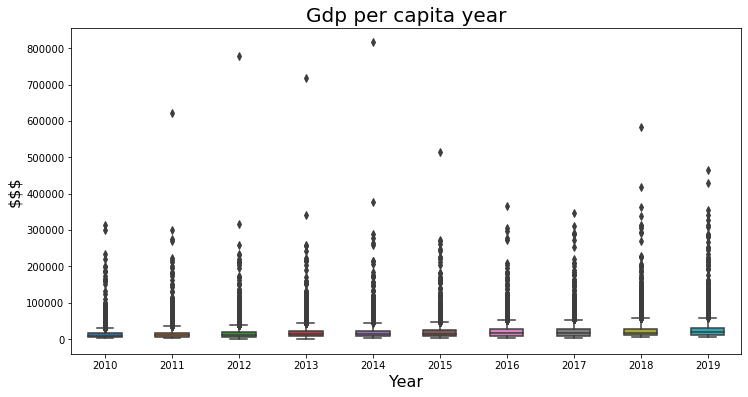

In [11]:
ax = sns.boxplot(y='gdp_per_capita_brl', x='year', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Gdp per capita year', fontsize=20)
ax.set_ylabel('$$$', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax